# Loan Default Prediction - EDA & Visualization
# This notebook explores the loan default dataset with visualizations.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
df = pd.read_csv('../data-files/Loan_Default.csv')
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (148670, 34)


,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [4]:
# Check missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
subm

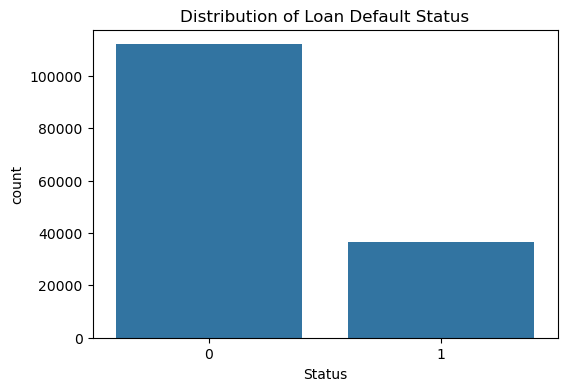

In [5]:
# Target distribution (Status)
plt.figure(figsize=(6, 4))
sns.countplot(x='Status', data=df)
plt.title("Distribution of Loan Default Status")
plt.show()

In [6]:
# Select numerical columns
num_cols = ['loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'income', 'Credit_Score']

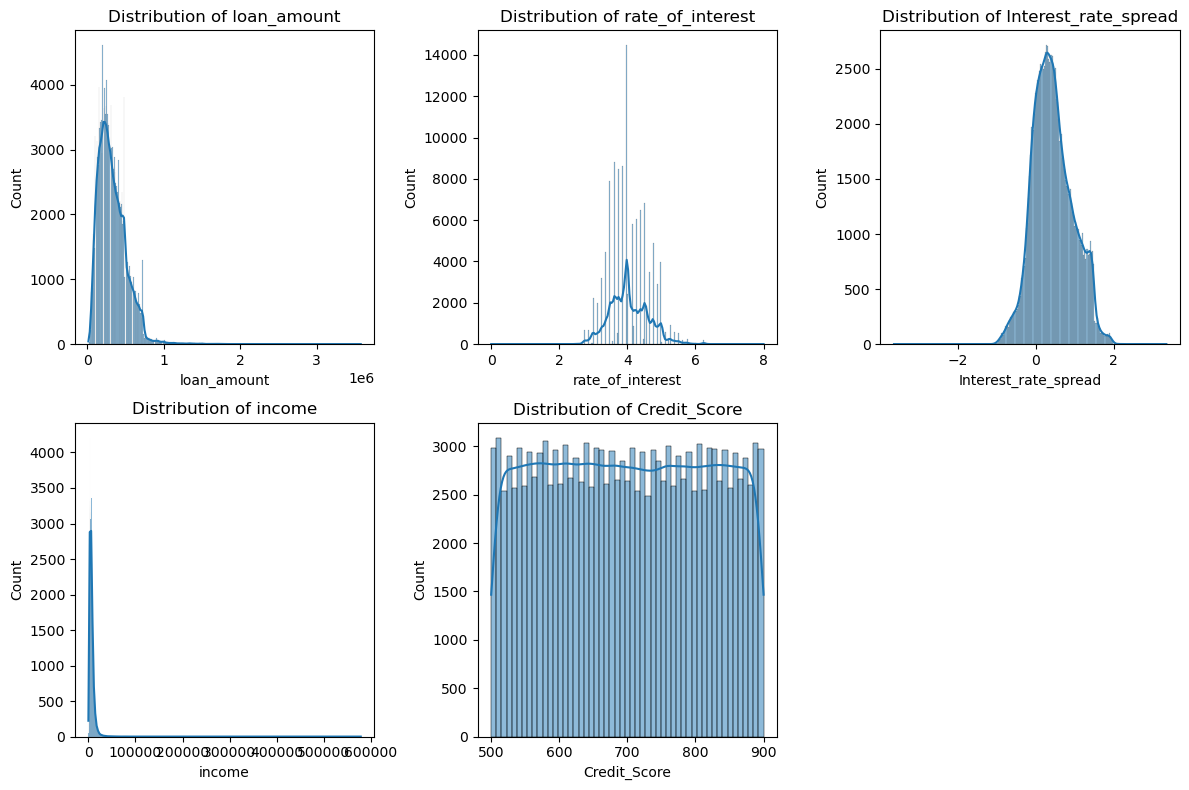

In [7]:
# Plot distributions
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

In [8]:
# Select categorical columns
cat_cols = ['loan_limit', 'Gender', 'loan_type', 'business_or_commercial', 'credit_type', 'age']

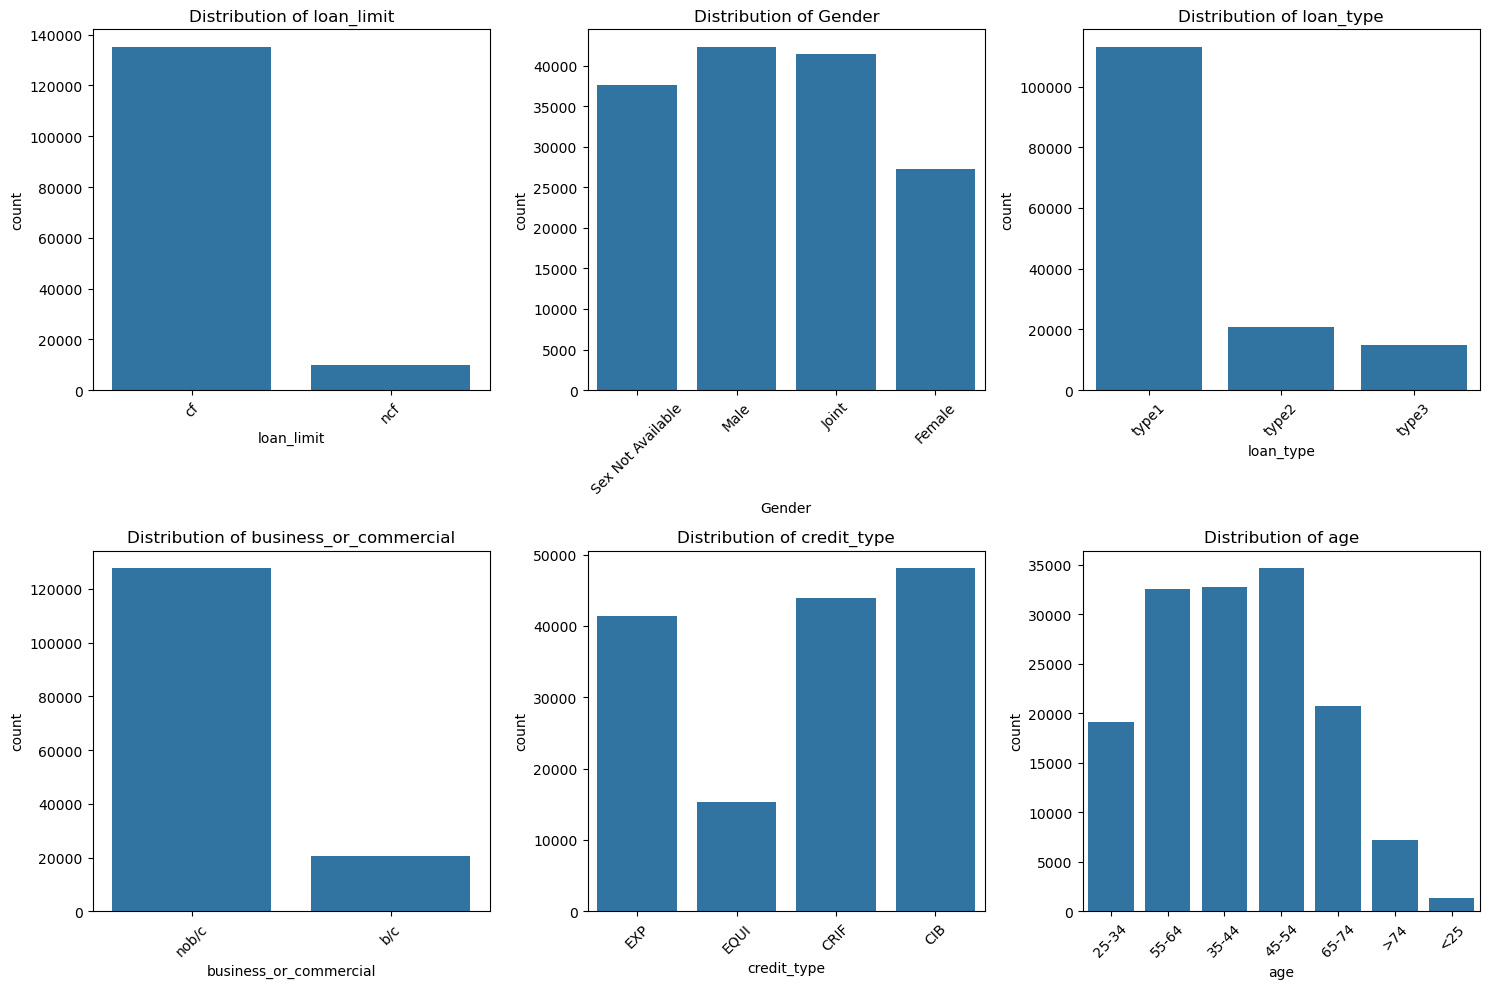

In [9]:
# Plot categorical distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

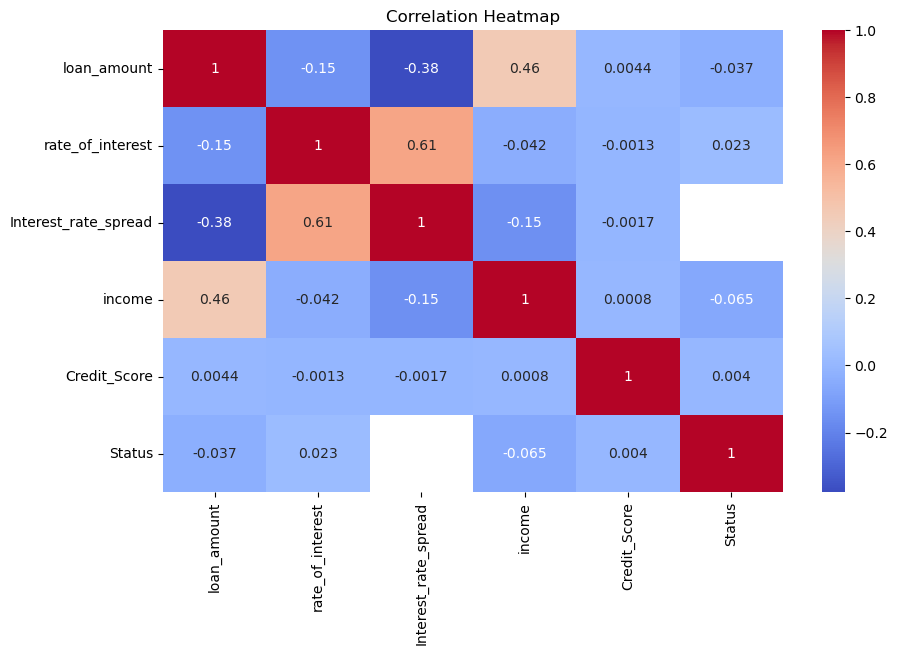

In [10]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols + ['Status']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

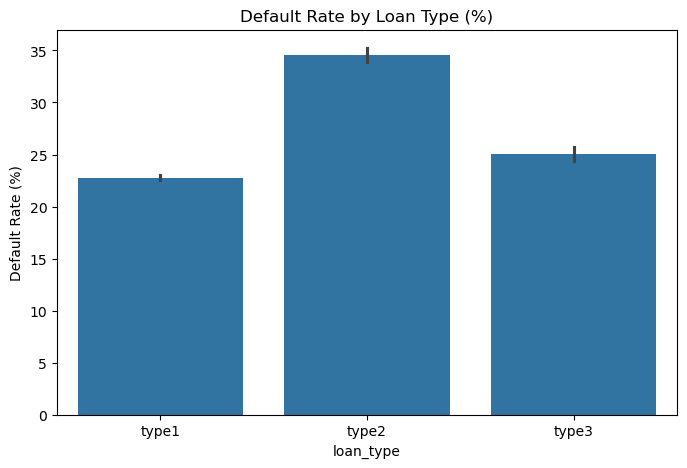

In [11]:
# Default rate by loan type
plt.figure(figsize=(8, 5))
sns.barplot(x='loan_type', y='Status', data=df, estimator=lambda x: sum(x) / len(x) * 100)
plt.title("Default Rate by Loan Type (%)")
plt.ylabel("Default Rate (%)")
plt.show()